In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
plot_x = np.linspace(-1., 6, 141)
plot_y = (plot_x - 2.5) ** 2 - 1.

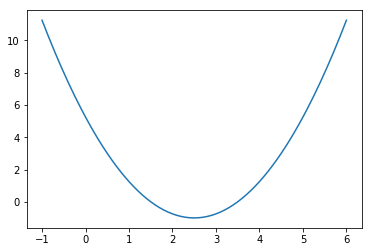

In [3]:
plt.plot(plot_x, plot_y)
plt.show()

In [0]:
# 每步最小移动，小于这个说明达到收敛
epsilon = 1e-8
# 学习率
eta = 0.1

In [5]:
def J(x):
    return (x - 2.5) ** 2 - 1.

def dJ(x):
    return 2 * (x - 2.5)
theta = 0
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    if abs(J(last_theta) - J(theta)) < epsilon:
        break
print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


### 打印看看它是怎么走的

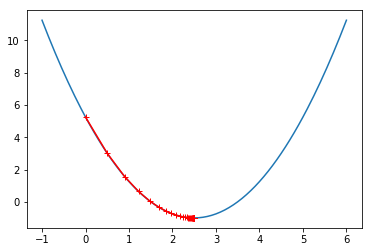

In [6]:
theta = 0
history_theta = [theta]
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    history_theta.append(theta)
    if abs(J(last_theta) - J(theta)) < epsilon:
        break

plt.plot(plot_x, J(plot_x))
plt.plot(np.array(history_theta), J(np.array(history_theta)), color='r', marker='+')
plt.show()

### 我们将这个东西封装一下，然后试试不同的参数的效果

In [0]:
history_theta = []

def gradient_descent(initial_theta, eta, epsilon=1e-8):
    theta = initial_theta
    history_theta.append(theta)
    
    while True:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        history_theta.append(theta)
        if abs(J(last_theta) - J(theta)) < epsilon:
            break

def print_history():
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(history_theta), J(np.array(history_theta)), color='r', marker='+')
    plt.show()

### 现在我们来测试不同的学习率对结果的影响

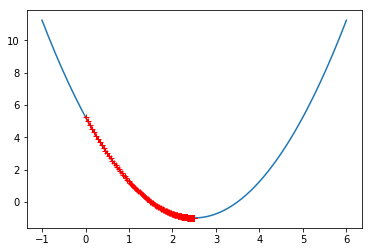

In [8]:
history_theta = []
eta = 0.01
gradient_descent(0, eta)
print_history()

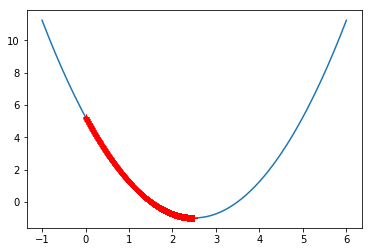

In [9]:
history_theta = []
eta = 0.001
gradient_descent(0, eta)
print_history()

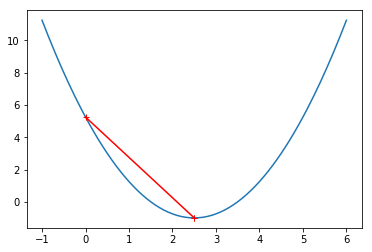

In [10]:
history_theta = []
eta = 0.5
gradient_descent(0, eta)
print_history()

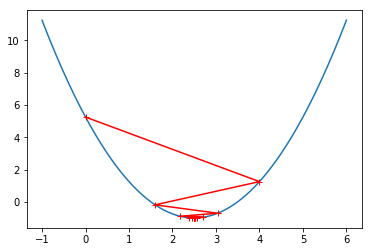

In [11]:
history_theta = []
eta = 0.8
gradient_descent(0, eta)
print_history()

In [12]:
history_theta = []
eta = 1.1
gradient_descent(0, eta)
print_history()

OverflowError: ignored

### 上面这种情况就是一直收敛不了
遇到这种情况，我们发现纯靠epsilon不行,还需要有一个最大迭代次数的限制，改造一下上面的代码

In [0]:
history_theta = []

def gradient_descent(initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    theta = initial_theta
    history_theta.append(theta)
    i_iter = 0
    while i_iter < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        history_theta.append(theta)
        if abs(J(last_theta) - J(theta)) < epsilon:
            break
        i_iter += 1
    return

def print_history():
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(history_theta), J(np.array(history_theta)), color='r', marker='+')
    plt.show()

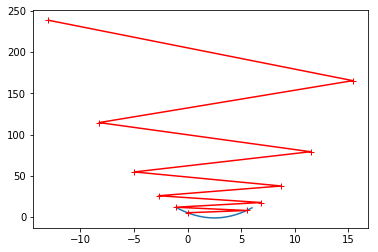

In [14]:
# 再运行一下eta=1.1的情况 我们给它指定一个步数，看看什么情况
history_theta = []
eta = 1.1
gradient_descent(0, eta, n_iters=10)
print_history()